### We are not classifying the digits with autoencoders but, we are adding noise to the digits and applyinh autoencoders to denoise and get the actual image

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


Lets Add Noise to our MNNIST Dataset by sampling random values from Gaussian distribution by using np.random.normal() and adding it to our original images to change pixel values

In [9]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

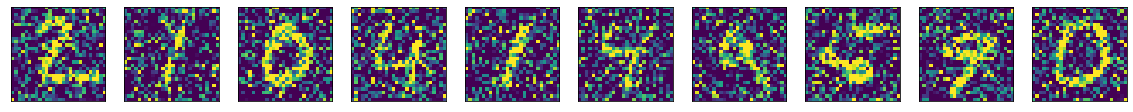

In [17]:
plt.figure(figsize=(20, 2))
for i in range(1, 11):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [26]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,batch_size=128,shuffle=True,validation_data=(x_test_noisy, x_test),)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.1284 - acc: 0.8086 - val_loss: 0.1152 - val_acc: 0.8103
Epoch 2/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.1131 - acc: 0.8112 - val_loss: 0.1090 - val_acc: 0.8107
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.1086 - acc: 0.8119 - val_loss: 0.1059 - val_acc: 0.8113
Epoch 4/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.1058 - acc: 0.8123 - val_loss: 0.1036 - val_acc: 0.8117
Epoch 5/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1038 - acc: 0.8125 - val_loss: 0.1021 - val_acc: 0.8120
Epoch 6/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.1023 - acc: 0.8127 - val_loss: 0.1008 - val_acc: 0.8116
Epoch 7/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.1011 - acc: 0.8129 - val_loss: 0.0997 - val